In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np
import matplotlib.pyplot as plt


2023-12-19 11:50:54.545955: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-19 11:50:54.570213: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 11:50:54.570234: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 11:50:54.570250: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 11:50:54.575192: I tensorflow/core/platform/cpu_feature_g

**Globals**

In [2]:
#Globals
NUM_EPOCHS = 10
seeds = [41,42,64,72,122]
LIST_of_model_histories = []

In [3]:
seed_index = 0
seed = seeds[seed_index]

In [4]:

# MNIST veri kümesini yükleme
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
# Normalize etme ve one-hot encoding
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Veri kümesini bölme
x_common_train = x_train[:500]
y_common_train = y_train[:500]

x_m1_train = x_train[500:1000]
y_m1_train = y_train[500:1000]

x_m2_train = x_train[1000:1500]
y_m2_train = y_train[1000:1500]



** Model Save & Load **

In [7]:
def save_model_history(history, model_type):
    filename = "Image_Model_histories/" + model_type + "_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
    with open(filename, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
        
def load_model_history(model_type, seed, epoch):
    filename = "Image_Model_histories/" + model_type + "_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
    with open(filename, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return history

In [8]:
# Modeli tanımlama
def create_model():
    np.random.seed(seed)
    tf.random.set_seed(seed)
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



Calculatin W0

In [13]:
# Ortak modeli eğitme
common_model = create_model()
history = common_model.fit(x_common_train, y_common_train, epochs=NUM_EPOCHS)
save_model_history(history, "M0")



Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 1.8525 - accuracy: 0.3960
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.9570 - accuracy: 0.7860
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.8520
Epoch 4/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.8700
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.9080
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.9200
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.9420
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9480
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.9620
Epoch 10/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1587 - accuracy: 0.9720


In [16]:
common_model.evaluate(x_test, y_test)

ValueError: in user code:

    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible


Calculating W1

In [10]:
# M1 ve M2 modelleri için klonlama ve eğitim
m1_model = tf.keras.models.clone_model(common_model)
m1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m1_model.set_weights(common_model.get_weights())
history=m1_model.fit(x_m1_train, y_m1_train, epochs=NUM_EPOCHS)
save_model_history(history, "M1")


Epoch 1/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6169 - accuracy: 0.8000
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 0.4359 - accuracy: 0.8680
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3575 - accuracy: 0.9080
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.9360
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9680
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 0.2049 - accuracy: 0.9540
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1755 - accuracy: 0.9600
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.1508 - accuracy: 0.9720
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1219 - accuracy: 0.9820
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9860


**Calculating W2**

In [11]:

m2_model = tf.keras.models.clone_model(common_model)
m2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m2_model.set_weights(common_model.get_weights())
m2_model.fit(x_m2_train, y_m2_train, epochs=NUM_EPOCHS)
save_model_history(history, "M2")

Epoch 1/10
16/16 [==============================] - 0s 4ms/step - loss: 0.6341 - accuracy: 0.7940
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.8660
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3660 - accuracy: 0.8960
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 0.3052 - accuracy: 0.9120
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9420
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9520
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.9540
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9680
Epoch 9/10
16/16 [==============================] - 0s 5ms/step - loss: 0.1553 - accuracy: 0.9760
Epoch 10/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1478 - accuracy: 0.9720


In [12]:
# Ağırlıkları kaydetme
weights_w1 = m1_model.get_weights()
weights_w2 = m2_model.get_weights()
weights_wi = common_model.get_weights()

In [15]:
# Adım 3: Arama Kümesi Performansı
# Arama kümesini belirleme (örneğin, x_train ve y_train'in bir kısmı)
x_val = x_train[1500:1600]
y_val = y_train[1500:1600]

In [14]:
# w1 ve w2 arasındaki çizgi üzerindeki modellerin performansını değerlendirme
best_val_acc = 0
best_weights = None
list_of_val_acc = []
list_of_alphas = []
for alpha in np.linspace(0, 1, 100):
    mixed_weights = [alpha * w1 + (1 - alpha) * w2 for w1, w2 in zip(weights_w1, weights_w2)]
    test_model = create_model()
    test_model.set_weights(mixed_weights)
    test_data = test_model.evaluate(x_val, y_val)
    val_loss, val_acc = test_data
    list_of_val_acc.append(val_acc)
    list_of_alphas.append(alpha)
    if val_acc > best_val_acc:
        best_alpha = alpha
        best_val_acc = val_acc
        best_weights = mixed_weights
        w_L = best_weights

#save list_of_val_acc to txt.file
filename = "Image_Model_histories/W1_W2_seed_" + str(seed) + "_epoch_" + str(NUM_EPOCHS) + ".pkl"
with open(filename, 'wb') as file_pi:
    pickle.dump(list_of_val_acc, file_pi)



4/4 [==============================] - 0s 5ms/step - loss: 0.3985 - accuracy: 0.8800


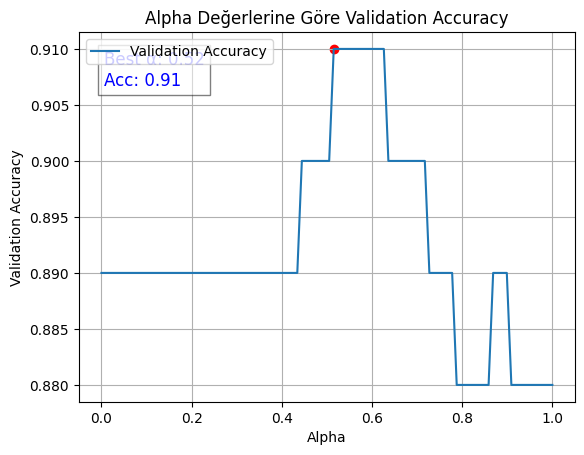

In [15]:
plt.plot(list_of_alphas, list_of_val_acc, label='Validation Accuracy')
plt.scatter([best_alpha], [best_val_acc], color='red')  # En iyi değeri işaretleme
plt.text(0.05, 0.95, f'Best α: {best_alpha:.2f}\nAcc: {best_val_acc:.2f}', horizontalalignment='left', verticalalignment='top', transform=plt.gca().transAxes, color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.title('Alpha Değerlerine Göre Validation Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('Plots/'+str(seed)+'_w1_w2_interpolation_accuracy.png')
plt.show()

In [16]:
print("Best alpha: ", best_alpha, "Best val acc: ", best_val_acc, "\nBest weights: ", best_weights)

Best alpha:  0.5151515151515152 Best val acc:  0.9100000262260437 
Best weights:  [array([[ 0.004496  , -0.01992319,  0.03317221, ..., -0.00812417,
         0.01808543,  0.00174538],
       [ 0.02984557,  0.02410129,  0.06502002, ..., -0.02625122,
        -0.05048724, -0.03257266],
       [-0.00511645,  0.07676905, -0.05126471, ..., -0.07316048,
        -0.01940535, -0.04533478],
       ...,
       [-0.02484854,  0.07467859,  0.01949131, ...,  0.07959519,
         0.04308585, -0.05904041],
       [ 0.07361899, -0.00956059, -0.04595418, ...,  0.01110417,
         0.0278872 ,  0.02523998],
       [ 0.03504883, -0.04202257, -0.04230445, ..., -0.00712707,
         0.06347648, -0.01059791]], dtype=float32), array([ 1.88297369e-02,  4.03907672e-02, -4.51231701e-03,  1.33929029e-02,
       -5.68103278e-05,  1.34410989e-02,  2.86980369e-03, -1.33615769e-02,
       -7.76265562e-03,  8.77255946e-03,  1.77689977e-02, -4.61642630e-03,
        4.71453788e-03,  7.51866400e-03, -2.33990955e-03,  1.14

In [17]:
num_samples = 14

In [18]:
# w_U için ağırlık kombinasyonlarını test etme
best_val_acc_u = 0
best_weights_u = None
list_of_val_acc_u = []
barycentric_points = []
for i in range(num_samples + 1):
    for j in range(num_samples - i + 1):
        alpha = i / num_samples
        beta = j / num_samples
        gamma = 1 - alpha - beta

        mixed_weights_u = [alpha * w + beta * w1 + gamma * w2 for w, w1, w2 in zip(weights_wi, weights_w1, weights_w2)]

        test_model_u = create_model()
        test_model_u.set_weights(mixed_weights_u)

        val_loss_u, val_acc_u = test_model_u.evaluate(x_val, y_val)
        list_of_val_acc_u.append(val_acc_u)
        barycentric_points.append([alpha, beta, gamma])

        if val_acc_u > best_val_acc_u:
            best_alpha_u, best_beta_u = alpha, beta
            best_val_acc_u = val_acc_u
            best_weights_u = mixed_weights_u
            w_U = best_weights_u

4/4 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.8300


In [57]:
len(list_of_val_acc_u)

120

Best alpha:  0.0 Best beta: 0.5 Best val acc:  0.8999999761581421


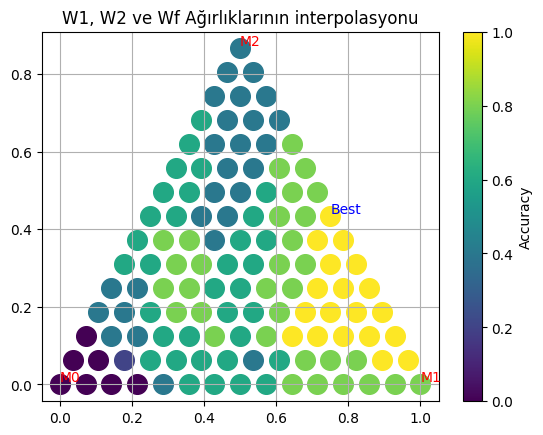

In [58]:
print("Best alpha: ", best_alpha_u, "Best beta:", best_beta_u, "Best val acc: ", best_val_acc_u)

x1, y1 = 0, 0 
x2, y2 = 1, 0
x3, y3 = 0.5, np.sqrt(0.75)

min_val_acc_u = np.min(list_of_val_acc_u)
max_val_acc_u = np.max(list_of_val_acc_u)
differece = np.max(list_of_val_acc_u) - min_val_acc_u
list_of_val_acc_u = [(val_acc - np.min(list_of_val_acc_u)) / differece for val_acc in list_of_val_acc_u]

for (alpa, beta, gamma), val_acc in zip(barycentric_points, list_of_val_acc_u):
    x = alpha * x1 + beta * x2 + gamma * x3
    y = alpha * y1 + beta * y2 + gamma * y3
    
    color = plt.cm.viridis(val_acc)
    plt.scatter(x, y, color=color,s=200)

plt.text(x1, y1, f'M0', verticalalignment='bottom', color='red')
plt.text(x2, y2, f'M1', verticalalignment='bottom', color='red')
plt.text(x3, y3, f'M2', verticalalignment='bottom', color='red')

plt.text(best_alpha_u * x1 +
        best_beta_u * x2 +
        (1-best_alpha_u-best_beta_u) * x3,
        best_alpha_u * y1 +
        best_beta_u * y2 +
        (1-best_alpha_u-best_beta_u) * y3, f'Best', verticalalignment='bottom', color='Blue')

plt.title('W1, W2 ve Wf Ağırlıklarının interpolasyonu')
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), label='Accuracy')
plt.savefig('Plots/'+str(seed)+'_wi_w1_w2_interpolation_accuracy.png')
plt.show()


In [59]:
# w_F için final modelin eğitilmesi ve ağırlıklarının alınması
final_model = create_model()
final_model.set_weights(weights_wi)  # wi'den başlangıç
x_combined_train = np.concatenate((x_m1_train, x_m2_train))
y_combined_train = np.concatenate((y_m1_train, y_m2_train))
history = final_model.fit(x_combined_train, y_combined_train, epochs=NUM_EPOCHS)
save_model_history(history, "Mf")
w_F = final_model.get_weights()


Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.8340
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4247 - accuracy: 0.8870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.9130
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.9160
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9360
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1896 - accuracy: 0.9480
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1659 - accuracy: 0.9590
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1353 - accuracy: 0.9660
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.1280 - accuracy: 0.9720
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1037 - accuracy: 0.9770
Epoch 11/

In [11]:
# wL, wU ve wF'yi belirleme (wU ve wF için benzer yaklaşımlar kullanılmalıdır)

# Adım 4: Test Kümesi Performansının Karşılaştırılması
# Test kümesini belirleme
x_test = x_test[:400]
y_test = y_test[:400]

In [61]:
# Test kümesi performansının karşılaştırılması
models = {'w_L': w_L, 'w_U': w_U, 'w_F': w_F}
with open(f'ComparisonResults/seed:{seed}.txt', 'w') as f:
    print(f"Model seed: {seed}\t\t\tTest Accuracy", file=f)
for name, weights in models.items():
    test_model = create_model()
    test_model.set_weights(weights)
    test_loss, test_acc = test_model.evaluate(x_test, y_test)
    print(f"{name} Test Accuracy: {test_acc}")
    with open(f'ComparisonResults/seed:{seed}.txt', 'a') as f:
        print(f"\t{name} Test Accuracy: {test_acc}", file=f)
    

13/13 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8975
w_L Test Accuracy: 0.8974999785423279
13/13 [==============================] - 0s 1ms/step - loss: 0.3840 - accuracy: 0.9025
w_U Test Accuracy: 0.9024999737739563
13/13 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.9175
w_F Test Accuracy: 0.9175000190734863


In [12]:
common_model.evaluate(x_test, y_test)

ValueError: in user code:

    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/home/aag/Desktop/codes/CollectiveLearning/.venv/lib/python3.10/site-packages/keras/src/backend.py", line 5575, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 10) and (None, 10) are incompatible
